# Frontal Detection Analysis (front crossing rates)

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
file_path = "/glade/work/kdagon/FrontDetector/CESMOutputs/"

In [93]:
fronts_file = "cesm_fronts_2000-2005.nc"
onehot_file = "cesm_frontsOneHot_2000-2005.nc"
rates_file = "cesm_frontRates_2000-2005.nc"
rates_file_viaPoly = "cesm_fronts_2000-2005_frontRates_viaPolylines.nc"

## Read in front rates file

In [94]:
#rates_fronts = xr.open_dataset(file_path+rates_file_viaPoly)
rates_fronts = xr.open_dataset(file_path+rates_file)

In [5]:
rates_fronts

<xarray.Dataset>
Dimensions:                          (bnds: 2, front: 5, lat: 68, lon: 141, months: 72, months12: 12, seasons: 25, seasons4: 4, total: 1, years: 6)
Coordinates:
  * lat                              (lat) float64 10.0 11.0 12.0 ... 76.0 77.0
  * lon                              (lon) float64 189.0 190.0 ... 328.0 329.0
  * months                           (months) object 2000-01-15 00:00:00 ... 2005-12-15 00:00:00
    clim_months                      (months12) object ...
  * seasons                          (seasons) object 2000-01-15 00:00:00 ... 2005-12-15 00:00:00
    clim_seasons                     (seasons4) object ...
  * years                            (years) object 2000-07-15 00:00:00 ... 2005-07-15 00:00:00
    front_type                       (front) object ...
Dimensions without coordinates: bnds, front, months12, seasons4, total
Data variables:
    month_bounds                     (months, bnds) object ...
    clim_month_bounds                (months12, 

In [95]:
srates_clim = rates_fronts.seasonal_rate_climatology

In [96]:
# approx. lat/lon here to get a CONUS rectangular region
srates_clim_CONUS = srates_clim.sel(lat=slice(26,50), lon=slice(235,292)) # CESM grid lons
#srates_clim_CONUS = srates_clim.sel(lat=slice(26,50), lon=slice(-125, -68)) # MERRA2 grid lons

In [97]:
srates_clim_CONUS_mean_wk = srates_clim_CONUS.mean(("lon","lat"))*7 # convert counts/day to counts/wk

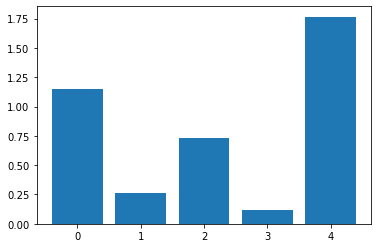

In [9]:
# DJF rates across front types
plt.bar(srates_clim_CONUS_mean_wk.front, srates_clim_CONUS_mean_wk[0]);

In [204]:
# cold front rates across seasons
srates_clim_CONUS_mean_wk[:,0]

<xarray.DataArray 'seasonal_rate_climatology' (seasons4: 4)>
array([1.1495355 , 1.0800674 , 0.71795475, 1.0774801 ], dtype=float32)
Coordinates:
    clim_seasons  (seasons4) object ...
    front_type    object ...
Dimensions without coordinates: seasons4

In [35]:
# sum along front types (leaving none type out)
srates_clim_CONUS_mean_wk[:,:4].sum("front")

<xarray.DataArray 'seasonal_rate_climatology' (seasons4: 4)>
array([2.2620063, 2.2117252, 1.8667715, 2.0572062], dtype=float32)
Coordinates:
    clim_seasons  (seasons4) object ...
Dimensions without coordinates: seasons4

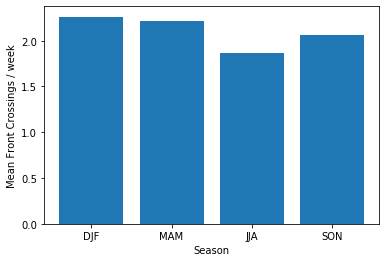

In [11]:
fig, ax = plt.subplots()

ax.bar(srates_clim_CONUS_mean_wk.seasons4, srates_clim_CONUS_mean_wk[:,:4].sum("front"))

labels = ['DJF', 'MAM', 'JJA', 'SON']
x = np.arange(len(labels))  # the label locations

ax.set_ylabel('Mean Front Crossings / week')
ax.set_xlabel('Season')
ax.set_xticks(x)
ax.set_xticklabels(labels);

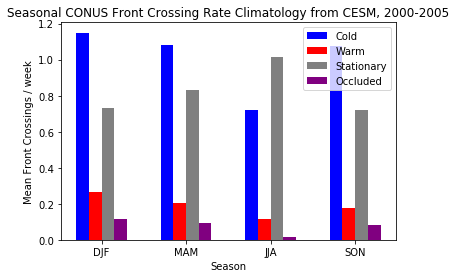

In [12]:
fig, ax = plt.subplots()

w = 0.15
labels = ['DJF', 'MAM', 'JJA', 'SON']
nseason = len(labels)
x = np.arange(nseason)  # the label locations

position = x + (w*(1-nseason)/2) + 0*w
ax.bar(position, srates_clim_CONUS_mean_wk[:,0], width=w, label="Cold", color='blue')
position = x + (w*(1-nseason)/2) + 1*w
ax.bar(position, srates_clim_CONUS_mean_wk[:,1], width=w, label="Warm", color='red')
position = x + (w*(1-nseason)/2) + 2*w
ax.bar(position, srates_clim_CONUS_mean_wk[:,2], width=w, label="Stationary", color='grey')
position = x + (w*(1-nseason)/2) + 3*w
ax.bar(position, srates_clim_CONUS_mean_wk[:,3], width=w, label="Occluded", color='purple')

ax.set_title('Seasonal CONUS Front Crossing Rate Climatology from CESM, 2000-2005')
ax.set_ylabel('Mean Front Crossings / week')
ax.set_xlabel('Season')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend();

#plt.savefig('../figures/cesm_srates_clim_CONUS_mean_wk.pdf')

## Validation data: Coded Surface Bulletin fronts

In [98]:
csb_file_path = "/glade/work/kdagon/ML-extremes/data/CODSUS/MERRA2/"
#csb_rates_file = "codsus_frontRates_2003-2005.nc"
#csb_rates_file = "codsus_masked_frontRates_2003-2005.nc"
csb_rates_file = "codsus_frontRates_2003-2008.nc"

In [99]:
csb_rates_fronts = xr.open_dataset(csb_file_path+csb_rates_file)
csb_rates_fronts

<xarray.Dataset>
Dimensions:                          (bnds: 2, front: 5, lat: 68, lon: 141, months: 72, months12: 12, seasons: 25, seasons4: 4, total: 1, years: 6)
Coordinates:
  * lat                              (lat) float64 10.0 11.0 12.0 ... 76.0 77.0
  * lon                              (lon) float64 -171.0 -170.0 ... -32.0 -31.0
  * months                           (months) datetime64[ns] 2003-01-15 ... 2008-12-15
    clim_months                      (months12) datetime64[ns] ...
  * seasons                          (seasons) datetime64[ns] 2003-01-15 ... 2008-12-15
    clim_seasons                     (seasons4) datetime64[ns] ...
  * years                            (years) datetime64[ns] 2003-07-15 ... 2008-07-15
    front_type                       (front) object ...
Dimensions without coordinates: bnds, front, months12, seasons4, total
Data variables:
    crs                              float64 ...
    month_bounds                     (months, bnds) datetime64[ns] ...
   

In [100]:
csb_srates_clim = csb_rates_fronts.seasonal_rate_climatology

In [101]:
# approx. lat/lon here to get a CONUS rectangular region
csb_srates_clim_CONUS = csb_srates_clim.sel(lat=slice(26,50), lon=slice(-125, -68)) # MERRA2 grid lons

In [102]:
csb_srates_clim_CONUS_mean_wk = csb_srates_clim_CONUS.mean(("lon","lat"))*7 # convert counts/day to counts/wk

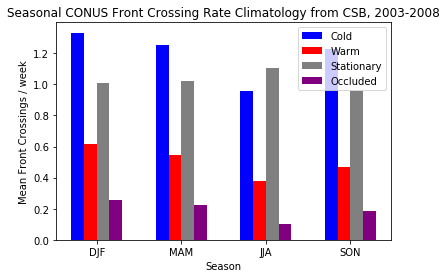

In [103]:
fig, ax = plt.subplots()

w = 0.15
labels = ['DJF', 'MAM', 'JJA', 'SON']
nseason = len(labels)
x = np.arange(nseason)  # the label locations

position = x + (w*(1-nseason)/2) + 0*w
ax.bar(position, csb_srates_clim_CONUS_mean_wk[:,0], width=w, label="Cold", color='blue')
position = x + (w*(1-nseason)/2) + 1*w
ax.bar(position, csb_srates_clim_CONUS_mean_wk[:,1], width=w, label="Warm", color='red')
position = x + (w*(1-nseason)/2) + 2*w
ax.bar(position, csb_srates_clim_CONUS_mean_wk[:,2], width=w, label="Stationary", color='grey')
position = x + (w*(1-nseason)/2) + 3*w
ax.bar(position, csb_srates_clim_CONUS_mean_wk[:,3], width=w, label="Occluded", color='purple')

#ax.set_title('Seasonal CONUS Front Crossing Rate Climatology from CSB, 2003-2005')
ax.set_title('Seasonal CONUS Front Crossing Rate Climatology from CSB, 2003-2008')
ax.set_ylabel('Mean Front Crossings / week')
ax.set_xlabel('Season')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend();

## Subset CESM output 2003-2005 to compare with the same obs years

Alternatively, sample first 6 obs years (2003-2008) and compare those with CESM output to at least match # years, if not exact same weather/forcing

In [87]:
rates_file_viaPoly_subset = "cesm_fronts_2003-2005_frontRates_viaPolylines.nc"
rates_file_subset = "cesm_fronts_2003-2005_frontRates.nc"

In [88]:
#rates_fronts_subset = xr.open_dataset(file_path+rates_file_viaPoly_subset)
rates_fronts_subset = xr.open_dataset(file_path+rates_file_subset)
rates_fronts_subset

<xarray.Dataset>
Dimensions:                          (bnds: 2, front: 5, lat: 68, lon: 141, months: 36, months12: 12, seasons: 13, seasons4: 4, total: 1, years: 3)
Coordinates:
  * lat                              (lat) float64 10.0 11.0 12.0 ... 76.0 77.0
  * lon                              (lon) float64 189.0 190.0 ... 328.0 329.0
  * months                           (months) object 2003-01-15 00:00:00 ... 2005-12-15 00:00:00
    clim_months                      (months12) object ...
  * seasons                          (seasons) object 2003-01-15 00:00:00 ... 2005-12-15 00:00:00
    clim_seasons                     (seasons4) object ...
  * years                            (years) object 2003-07-15 00:00:00 ... 2005-07-15 00:00:00
    front_type                       (front) object ...
Dimensions without coordinates: bnds, front, months12, seasons4, total
Data variables:
    month_bounds                     (months, bnds) object ...
    clim_month_bounds                (months12, 

In [89]:
srates_clim_subset = rates_fronts_subset.seasonal_rate_climatology

In [37]:
# approx. lat/lon here to get a CONUS rectangular region
srates_clim_subset_CONUS = srates_clim_subset.sel(lat=slice(26,50), lon=slice(235,292)) # CESM grid lons
#srates_clim_subset_CONUS = srates_clim_subset.sel(lat=slice(26,50), lon=slice(-125, -68)) # MERRA2 grid lons

In [38]:
srates_clim_subset_CONUS_mean_wk = srates_clim_subset_CONUS.mean(("lon","lat"))*7 # convert counts/day to counts/wk

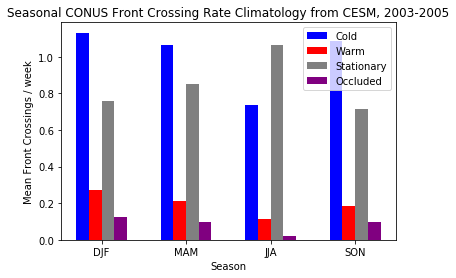

In [39]:
fig, ax = plt.subplots()

w = 0.15
labels = ['DJF', 'MAM', 'JJA', 'SON']
nseason = len(labels)
x = np.arange(nseason)  # the label locations

position = x + (w*(1-nseason)/2) + 0*w
ax.bar(position, srates_clim_subset_CONUS_mean_wk[:,0], width=w, label="Cold", color='blue')
position = x + (w*(1-nseason)/2) + 1*w
ax.bar(position, srates_clim_subset_CONUS_mean_wk[:,1], width=w, label="Warm", color='red')
position = x + (w*(1-nseason)/2) + 2*w
ax.bar(position, srates_clim_subset_CONUS_mean_wk[:,2], width=w, label="Stationary", color='grey')
position = x + (w*(1-nseason)/2) + 3*w
ax.bar(position, srates_clim_subset_CONUS_mean_wk[:,3], width=w, label="Occluded", color='purple')

ax.set_title('Seasonal CONUS Front Crossing Rate Climatology from CESM, 2003-2005')
ax.set_ylabel('Mean Front Crossings / week')
ax.set_xlabel('Season')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend();

In [40]:
# sum along front types (leaving none type out)
srates_clim_subset_CONUS_mean_wk[:,:4].sum("front")

<xarray.DataArray 'seasonal_rate_climatology' (seasons4: 4)>
array([2.289492 , 2.2268815, 1.9347776, 2.0877101], dtype=float32)
Coordinates:
    clim_seasons  (seasons4) object ...
Dimensions without coordinates: seasons4

In [41]:
srates_clim_subset_CONUS_mean_wk[:,:4]

<xarray.DataArray 'seasonal_rate_climatology' (seasons4: 4, front: 4)>
array([[1.1323729 , 0.272848  , 0.7593436 , 0.1249272 ],
       [1.0645177 , 0.21264115, 0.8538531 , 0.09586956],
       [0.7353323 , 0.11503996, 1.0653749 , 0.01903048],
       [1.0897437 , 0.18350135, 0.7171707 , 0.09729443]], dtype=float32)
Coordinates:
    clim_seasons  (seasons4) object ...
    front_type    (front) object ...
Dimensions without coordinates: seasons4, front

In [42]:
# standard deviation across fronts for each season (to get error bars?)
np.std(srates_clim_subset_CONUS_mean_wk[:,:4], axis=1)

<xarray.DataArray 'seasonal_rate_climatology' (seasons4: 4)>
array([0.399525  , 0.41137573, 0.4340197 , 0.40477794], dtype=float32)
Coordinates:
    clim_seasons  (seasons4) object ...
Dimensions without coordinates: seasons4

In [43]:
csb_srates_clim_CONUS_mean_wk[:,:4].sum("front")

<xarray.DataArray 'seasonal_rate_climatology' (seasons4: 4)>
array([3.2146769, 3.041231 , 2.5419414, 2.8441732], dtype=float32)
Coordinates:
    clim_seasons  (seasons4) datetime64[ns] ...
Dimensions without coordinates: seasons4

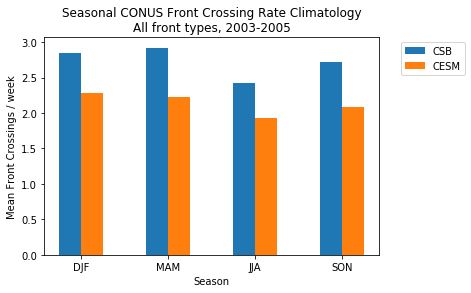

In [76]:
fig, ax = plt.subplots()

w = 0.25
labels = ['DJF', 'MAM', 'JJA', 'SON']
nseason = len(labels)
x = np.arange(nseason)  # the label locations

position = x - (w/2)
ax.bar(position, csb_srates_clim_CONUS_mean_wk[:,:4].sum("front"), width=w, label="CSB", color='C0')
position = x + (w/2)
ax.bar(position, srates_clim_subset_CONUS_mean_wk[:,:4].sum("front"), width=w, label="CESM", color='C1')

ax.set_title('Seasonal CONUS Front Crossing Rate Climatology\nAll front types, 2003-2005')
ax.set_ylabel('Mean Front Crossings / week')
ax.set_xlabel('Season')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend(bbox_to_anchor=(1.05, 1));
#plt.savefig('srates_clim_CONUS_CSB_CESM_2003-2005.pdf', bbox_inches='tight')

In [107]:
# CESM: 2003-2005
srates_clim_subset_CONUS_mean_wk[:,:4].sum("front")

<xarray.DataArray 'seasonal_rate_climatology' (seasons4: 4)>
array([2.289492 , 2.2268815, 1.9347776, 2.0877101], dtype=float32)
Coordinates:
    clim_seasons  (seasons4) object ...
Dimensions without coordinates: seasons4

In [106]:
# CESM: 2000-2005
srates_clim_CONUS_mean_wk[:,:4].sum("front")

<xarray.DataArray 'seasonal_rate_climatology' (seasons4: 4)>
array([2.2620063, 2.2117252, 1.8667715, 2.0572062], dtype=float32)
Coordinates:
    clim_seasons  (seasons4) object ...
Dimensions without coordinates: seasons4

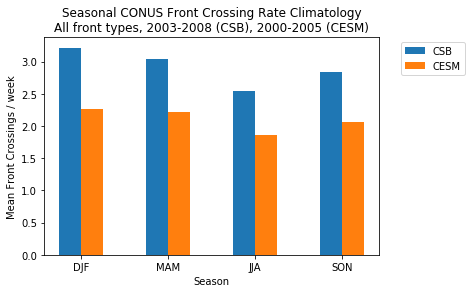

In [104]:
fig, ax = plt.subplots()

w = 0.25
labels = ['DJF', 'MAM', 'JJA', 'SON']
nseason = len(labels)
x = np.arange(nseason)  # the label locations

position = x - (w/2)
ax.bar(position, csb_srates_clim_CONUS_mean_wk[:,:4].sum("front"), width=w, label="CSB", color='C0')
position = x + (w/2)
ax.bar(position, srates_clim_CONUS_mean_wk[:,:4].sum("front"), width=w, label="CESM", color='C1')

ax.set_title('Seasonal CONUS Front Crossing Rate Climatology\nAll front types, 2003-2008 (CSB), 2000-2005 (CESM)')
ax.set_ylabel('Mean Front Crossings / week')
ax.set_xlabel('Season')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend(bbox_to_anchor=(1.05, 1));

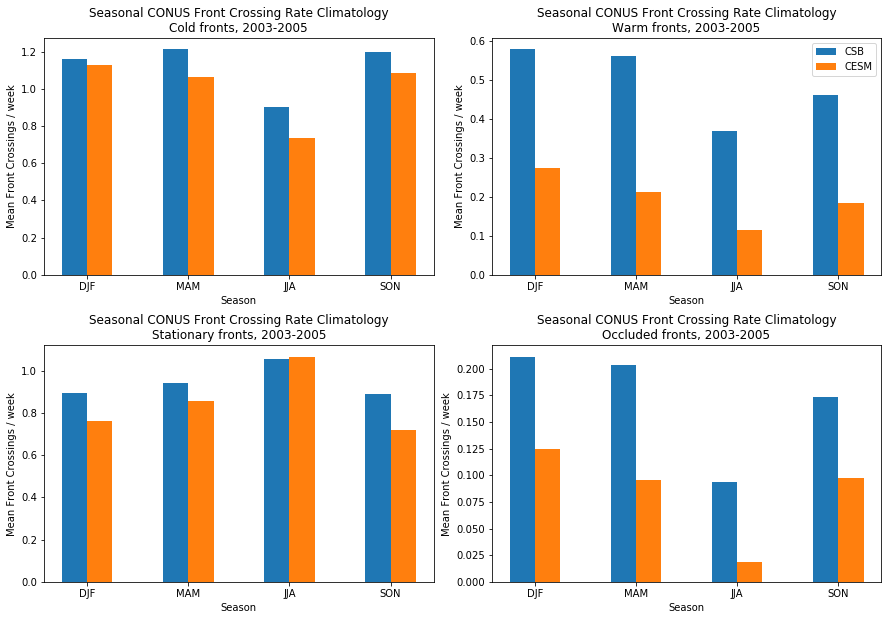

In [77]:
# by front type
frontstrings = ('Cold', 'Warm', 'Stationary', 'Occluded')
nfronts = len(frontstrings)
fig, ax = plt.subplots(2, 2, figsize=(15,10))
ax = ax.ravel()

for i in range(nfronts):
    w = 0.25
    labels = ['DJF', 'MAM', 'JJA', 'SON']
    nseason = len(labels)
    x = np.arange(nseason)  # the label locations

    position = x - (w/2)
    ax[i].bar(position, csb_srates_clim_CONUS_mean_wk[:,i], width=w, label="CSB", color='C0')
    position = x + (w/2)
    ax[i].bar(position, srates_clim_subset_CONUS_mean_wk[:,i], width=w, label="CESM", color='C1')

    ax[i].set_title('Seasonal CONUS Front Crossing Rate Climatology\n'+frontstrings[i]+' fronts, 2003-2005')
    ax[i].set_ylabel('Mean Front Crossings / week')
    ax[i].set_xlabel('Season')
    ax[i].set_xticks(x)
    ax[i].set_xticklabels(labels)

    if i==1:
        ax[i].legend();
        
plt.subplots_adjust(wspace=0.15, hspace=0.3)
#plt.savefig('srates_clim_CONUS_CSB_CESM_2003-2005_byfronttype.pdf', bbox_inches='tight')

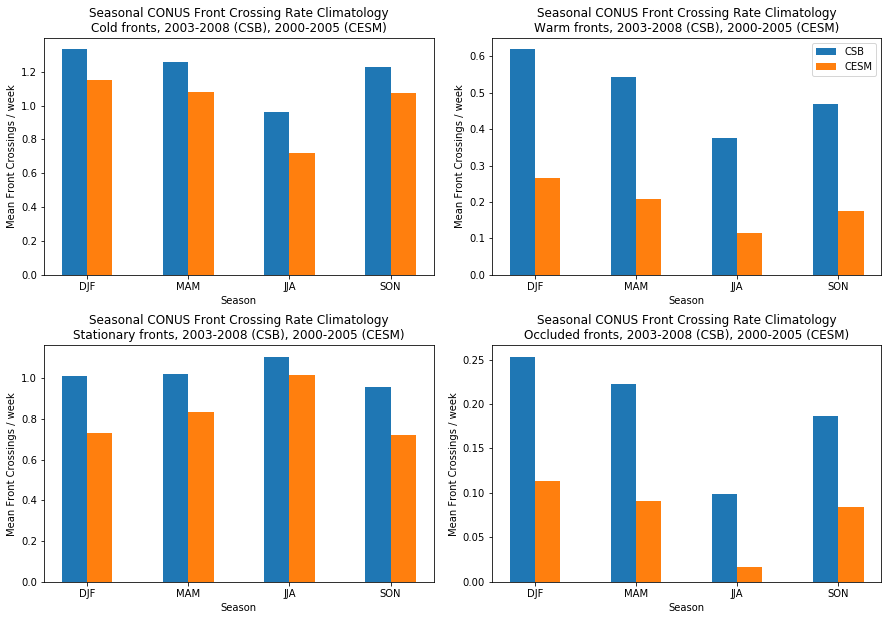

In [108]:
# by front type
frontstrings = ('Cold', 'Warm', 'Stationary', 'Occluded')
nfronts = len(frontstrings)
fig, ax = plt.subplots(2, 2, figsize=(15,10))
ax = ax.ravel()

for i in range(nfronts):
    w = 0.25
    labels = ['DJF', 'MAM', 'JJA', 'SON']
    nseason = len(labels)
    x = np.arange(nseason)  # the label locations

    position = x - (w/2)
    ax[i].bar(position, csb_srates_clim_CONUS_mean_wk[:,i], width=w, label="CSB", color='C0')
    position = x + (w/2)
    ax[i].bar(position, srates_clim_CONUS_mean_wk[:,i], width=w, label="CESM", color='C1')

    ax[i].set_title('Seasonal CONUS Front Crossing Rate Climatology\n'+frontstrings[i]+' fronts, 2003-2008 (CSB), 2000-2005 (CESM)')
    ax[i].set_ylabel('Mean Front Crossings / week')
    ax[i].set_xlabel('Season')
    ax[i].set_xticks(x)
    ax[i].set_xticklabels(labels)

    if i==1:
        ax[i].legend();
        
plt.subplots_adjust(wspace=0.15, hspace=0.3)

## Monthly rate climatology

In [109]:
mrates_clim = rates_fronts.monthly_rate_climatology

In [110]:
mrates_clim_CONUS_mean_wk = mrates_clim.sel(lat=slice(26,50), lon=slice(235,292)).mean(("lon","lat"))*7

In [78]:
mrates_clim_subset = rates_fronts_subset.monthly_rate_climatology
mrates_clim_subset

<xarray.DataArray 'monthly_rate_climatology' (months12: 12, front: 5, lat: 68, lon: 141)>
[575280 values with dtype=float32]
Coordinates:
  * lat          (lat) float64 10.0 11.0 12.0 13.0 14.0 ... 74.0 75.0 76.0 77.0
  * lon          (lon) float64 189.0 190.0 191.0 192.0 ... 327.0 328.0 329.0
    clim_months  (months12) object ...
    front_type   (front) object ...
Dimensions without coordinates: months12, front
Attributes:
    long_name:     Climatology of Monthly Frontal Boundary Crossing Rate
    cell_methods:  time: mean within years time: mean over years
    valid_min:     0
    valid_max:     31
    grid_mapping:  crs
    units:         counts day-1

In [79]:
# CONUS mean, per week
mrates_clim_subset_CONUS_mean_wk = mrates_clim_subset.sel(lat=slice(26,50), lon=slice(235,292)).mean(("lon","lat"))*7 # CESM grid lons
#mrates_clim_subset_CONUS_mean_wk = mrates_clim_subset.sel(lat=slice(26,50), lon=slice(-125, -68)).mean(("lon","lat"))*7 # MERRA grid lons

In [115]:
# sum along front types (leaving none type out)
mrates_clim_subset_CONUS_mean_wk[:,:4].sum("front")

<xarray.DataArray 'monthly_rate_climatology' (months12: 12)>
array([2.4490917, 2.254138 , 2.4414086, 2.2867742, 1.9543937, 2.042981 ,
       1.8388432, 1.9259992, 2.0631495, 2.0315833, 2.1702688, 2.1618242],
      dtype=float32)
Coordinates:
    clim_months  (months12) object ...
Dimensions without coordinates: months12

In [112]:
csb_mrates_clim = csb_rates_fronts.monthly_rate_climatology

In [113]:
csb_mrates_clim_CONUS_mean_wk = csb_mrates_clim.sel(lat=slice(26,50), lon=slice(-125, -68)).mean(("lon","lat"))*7

In [114]:
csb_mrates_clim_CONUS_mean_wk[:,:4].sum("front")

<xarray.DataArray 'monthly_rate_climatology' (months12: 12)>
array([3.1143806, 3.2840111, 3.3001924, 2.934127 , 2.8895297, 2.681441 ,
       2.4165668, 2.5325117, 2.6632967, 2.8659258, 3.0031698, 3.2500377],
      dtype=float32)
Coordinates:
    clim_months  (months12) datetime64[ns] ...
Dimensions without coordinates: months12

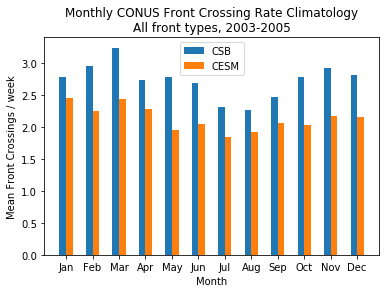

In [83]:
fig, ax = plt.subplots()

w = 0.25
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
nseason = len(labels)
x = np.arange(nseason)  # the label locations

position = x - (w/2)
ax.bar(position, csb_mrates_clim_CONUS_mean_wk[:,:4].sum("front"), width=w, label="CSB", color='C0')
position = x + (w/2)
ax.bar(position, mrates_clim_subset_CONUS_mean_wk[:,:4].sum("front"), width=w, label="CESM", color='C1')

ax.set_title('Monthly CONUS Front Crossing Rate Climatology\nAll front types, 2003-2005')
ax.set_ylabel('Mean Front Crossings / week')
ax.set_xlabel('Month')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend();
#plt.savefig('mrates_clim_CONUS_CSB_CESM_2003-2005.pdf', bbox_inches='tight')

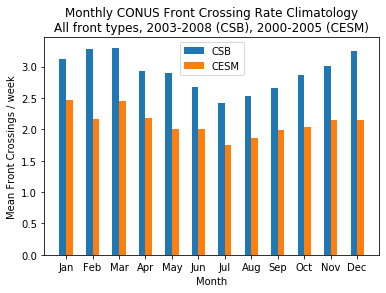

In [116]:
fig, ax = plt.subplots()

w = 0.25
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
nseason = len(labels)
x = np.arange(nseason)  # the label locations

position = x - (w/2)
ax.bar(position, csb_mrates_clim_CONUS_mean_wk[:,:4].sum("front"), width=w, label="CSB", color='C0')
position = x + (w/2)
ax.bar(position, mrates_clim_CONUS_mean_wk[:,:4].sum("front"), width=w, label="CESM", color='C1')

ax.set_title('Monthly CONUS Front Crossing Rate Climatology\nAll front types, 2003-2008 (CSB), 2000-2005 (CESM)')
ax.set_ylabel('Mean Front Crossings / week')
ax.set_xlabel('Month')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend();

## Spatial Maps of Seasonal Climatology

In [62]:
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from matplotlib import cm

In [119]:
srates_clim_wk = srates_clim*7

In [117]:
srates_clim_subset_wk = srates_clim_subset*7
srates_clim_subset_CONUS_wk = srates_clim_subset_CONUS*7

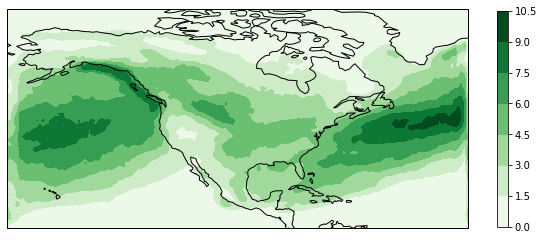

In [64]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_axes([0.,0.,1.,1.], projection=ccrs.PlateCarree())

# start with the first season (DJF)
field, lon = add_cyclic_point(srates_clim_subset_wk.sum('front')[0,:,:], coord=srates_clim_subset.lon)
lat = srates_clim_subset.lat

cf = ax.contourf(lon, lat, field, vmin=0, vmax=10, cmap=cm.Greens, transform=ccrs.PlateCarree()) # trying to get rid of contourf interpolation

ax.coastlines()

plt.colorbar(cf, shrink=0.5)

In [ ]:
import hvplot.xarray
import geoviews as gv

In [ ]:
plot_DJF_rate = srates_clim_subset_wk.sum('front')[0,:,:].hvplot(x='lon', y='lat', kind='contourf',
                  cmap=cm.Blues,
                  projection=ccrs.LambertCylindrical())
plot_DJF_rate * gv.feature.grid * gv.feature.coastline

In [120]:
csb_srates_clim_wk = csb_srates_clim*7
csb_srates_clim_CONUS_wk = csb_srates_clim_CONUS*7

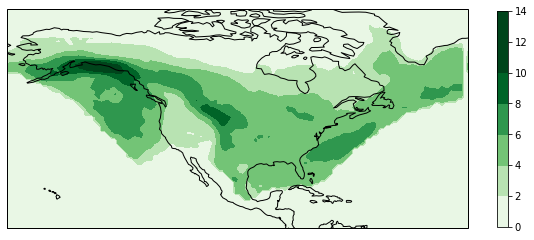

In [66]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_axes([0.,0.,1.,1.], projection=ccrs.PlateCarree())

# start with the first season
field, lon = add_cyclic_point(csb_srates_clim_wk.sum('front')[0,:,:], coord=csb_srates_clim.lon)
lat = csb_srates_clim.lat

cf = ax.contourf(lon, lat, field, vmin=0, vmax=10, cmap=cm.Greens, transform=ccrs.PlateCarree()) # trying to get rid of contourf interpolation

ax.coastlines()

plt.colorbar(cf, shrink=0.5)

In [67]:
import matplotlib as mpl

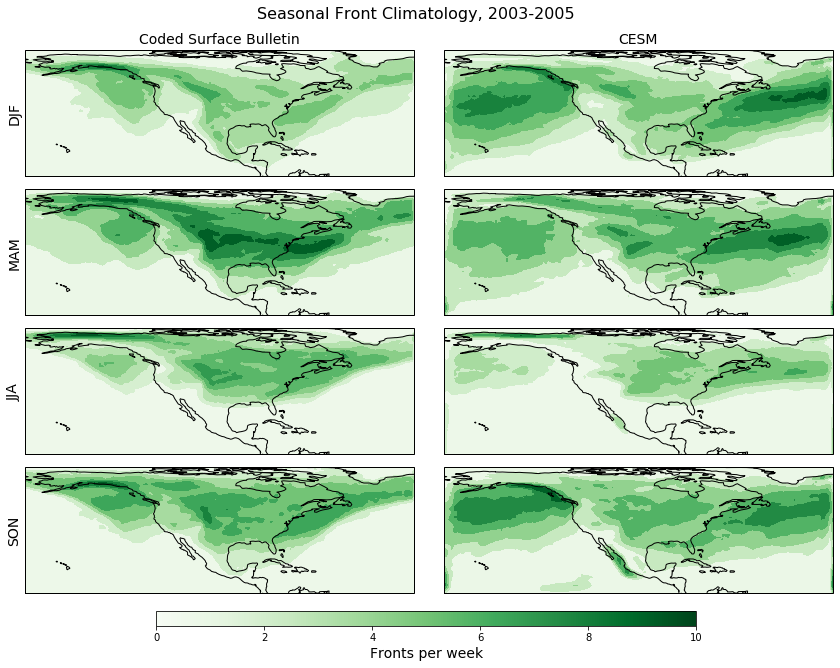

In [92]:
# by season type
seastrings = ('DJF', 'MAM', 'JJA', 'SON')
nsea = len(seastrings)
fig, axs = plt.subplots(nsea, 2, figsize=(15,10), subplot_kw={'projection': ccrs.LambertCylindrical()})
#axs = axs.ravel()

for i in range(nsea):
    if i == 0:
        axs[i,0].set_title('Coded Surface Bulletin', fontsize=14) 
    field, lon = add_cyclic_point(csb_srates_clim_wk.sum('front')[i,:,:], coord=csb_srates_clim.lon)
    lat = csb_srates_clim.lat
    cf = axs[i,0].contourf(lon, lat, field, cmap=cm.Greens, transform=ccrs.PlateCarree()) # trying to get rid of contourf interpolation
    axs[i,0].coastlines()
    # can't get ylabels to work?
    axs[i,0].set_ylabel(seastrings[i], fontsize=14)
    axs[i,0].set_yticks([])
    fig.suptitle('Seasonal Front Climatology, 2003-2005', fontsize=16, y=0.94)

    
for i in range(nsea):
    if i == 0:
        axs[i,1].set_title('CESM', fontsize=14)
    field, lon = add_cyclic_point(srates_clim_subset_wk.sum('front')[i,:,:], coord=srates_clim_subset.lon)
    lat = srates_clim_subset.lat
    cf = axs[i,1].contourf(lon, lat, field, cmap=cm.Greens, transform=ccrs.PlateCarree()) # trying to get rid of contourf interpolation
    axs[i,1].coastlines()
    
cb_ax = fig.add_axes([0.26, 0.08, 0.5, 0.02])
cmap = mpl.cm.Greens
norm = mpl.colors.Normalize(vmin=0, vmax=10)
cb1 = mpl.colorbar.ColorbarBase(cb_ax, cmap, norm=norm, orientation='horizontal')
cb1.ax.set_xlabel('Fronts per week', fontsize=14)

plt.subplots_adjust(wspace=0, hspace=0.1)
#plt.savefig('srates_clim_CSB_CESM_2003-2005_lambert.pdf', bbox_inches='tight')

looks like it's the polyline method that's causing the stippling on the CESM filled coutour plots (grid issue?)

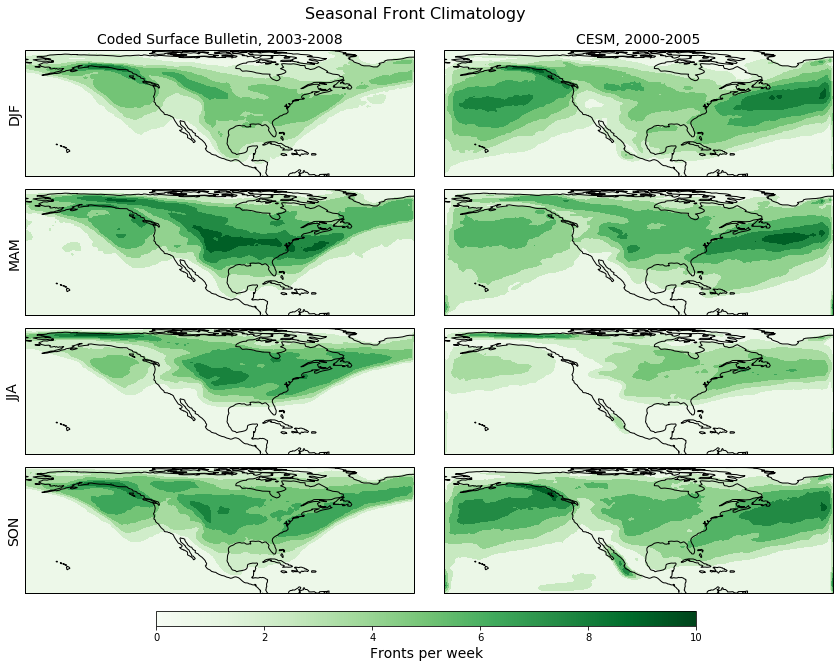

In [121]:
# by season type
seastrings = ('DJF', 'MAM', 'JJA', 'SON')
nsea = len(seastrings)
fig, axs = plt.subplots(nsea, 2, figsize=(15,10), subplot_kw={'projection': ccrs.LambertCylindrical()})
#axs = axs.ravel()

for i in range(nsea):
    if i == 0:
        axs[i,0].set_title('Coded Surface Bulletin, 2003-2008', fontsize=14) 
    field, lon = add_cyclic_point(csb_srates_clim_wk.sum('front')[i,:,:], coord=csb_srates_clim.lon)
    lat = csb_srates_clim.lat
    cf = axs[i,0].contourf(lon, lat, field, cmap=cm.Greens, transform=ccrs.PlateCarree()) # trying to get rid of contourf interpolation
    axs[i,0].coastlines()
    # can't get ylabels to work?
    axs[i,0].set_ylabel(seastrings[i], fontsize=14)
    axs[i,0].set_yticks([])
    fig.suptitle('Seasonal Front Climatology', fontsize=16, y=0.94)

    
for i in range(nsea):
    if i == 0:
        axs[i,1].set_title('CESM, 2000-2005', fontsize=14)
    field, lon = add_cyclic_point(srates_clim_wk.sum('front')[i,:,:], coord=srates_clim_subset.lon)
    lat = srates_clim_subset.lat
    cf = axs[i,1].contourf(lon, lat, field, cmap=cm.Greens, transform=ccrs.PlateCarree()) # trying to get rid of contourf interpolation
    axs[i,1].coastlines()
    
cb_ax = fig.add_axes([0.26, 0.08, 0.5, 0.02])
cmap = mpl.cm.Greens
norm = mpl.colors.Normalize(vmin=0, vmax=10)
cb1 = mpl.colorbar.ColorbarBase(cb_ax, cmap, norm=norm, orientation='horizontal')
cb1.ax.set_xlabel('Fronts per week', fontsize=14)

plt.subplots_adjust(wspace=0, hspace=0.1)